In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [4]:
X, y = datasets.load_iris(return_X_y=True , as_frame = True)

In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

150 Rows que representan una flor, cada una tiene 4 características que podemos usar para nuestra predicción. Tenemos tres especies diferentes representado de 0 a 2. [1 , 2, 3] 

El objeto es entrenar nuestra red para predecir especies 

In [7]:
# Usamos el 20% de nuestro database para testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [8]:
#primer paso, inicializar el modelo. Modelo más básico
model = tf.keras.models.Sequential()

1) Agregamos input layer.
2) Pareja de hidden layers
3) output layer

Usamos ReLU como función de activación.

Escogemos 10 neuronas.(sin ninguna razón en particular)

In [9]:
#Input layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape = (X.shape[1],)))
# Hidden layers
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu))
#Output layer -> tres casos -> tres neuronas
model.add(tf.keras.layers.Dense(3))
#Softmax layer
model.add(tf.keras.layers.Softmax())

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Usando el optimizador


In [10]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

We compile our final model

Accuracy -> precisión de nuestro modelo

In [11]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = optim, metrics=['accuracy']
)

history = model.fit(X_train.values, y_train.values,
                    validation_data = (X_test.values , y_test.values),
                    epochs = 20,
                    batch_size = 32
                    )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3533 - loss: 1.5333 - val_accuracy: 0.3000 - val_loss: 1.5354
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2971 - loss: 1.4846 - val_accuracy: 0.3000 - val_loss: 1.3827
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3533 - loss: 1.2618 - val_accuracy: 0.3000 - val_loss: 1.2674
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3294 - loss: 1.2048 - val_accuracy: 0.3000 - val_loss: 1.1796
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3367 - loss: 1.1169 - val_accuracy: 0.3000 - val_loss: 1.1061
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3210 - loss: 1.0660 - val_accuracy: 0.3000 - val_loss: 1.0406
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3358 - loss: 0.9997 - val_accuracy: 0.3000 - val_loss: 0.9870
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3887 - loss: 0.9397 - val_accuracy: 0.4333 - val_loss: 0.9410


In [12]:
history.history

{'accuracy': [0.34166666865348816,
  0.34166666865348816,
  0.34166666865348816,
  0.34166666865348816,
  0.34166666865348816,
  0.34166666865348816,
  0.3499999940395355,
  0.38333332538604736,
  0.574999988079071,
  0.6499999761581421,
  0.6666666865348816,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929,
  0.675000011920929],
 'loss': [1.536840558052063,
  1.3937413692474365,
  1.2659872770309448,
  1.1808472871780396,
  1.1039015054702759,
  1.0422108173370361,
  0.9883660674095154,
  0.9439353346824646,
  0.9064599275588989,
  0.8727918863296509,
  0.8446972966194153,
  0.8173134326934814,
  0.7915162444114685,
  0.7697057127952576,
  0.7490823864936829,
  0.7287450432777405,
  0.7081412672996521,
  0.6875544190406799,
  0.6678003072738647,
  0.6490660309791565],
 'val_accuracy': [0.30000001192092896,
  0.30000001192092896,
  0.30000001192092896,
  0.3000000119209

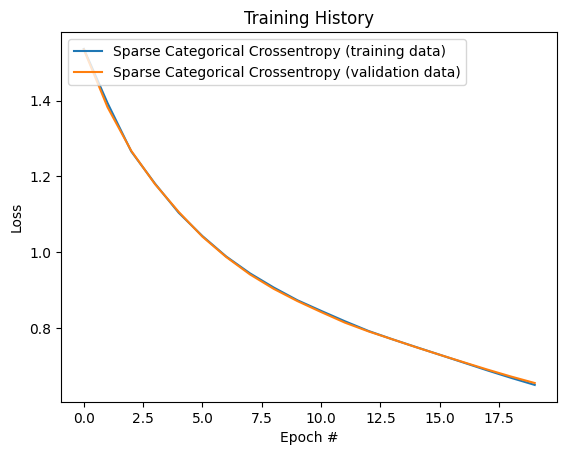

In [13]:
# Plot history
plt.plot(history.history['loss'], label ='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label = 'Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

In [14]:
model.predict(X_test[:1])

#Probabilidad que sea:  Categoria 1 | Categoria 2 | Categoría 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.11366006, 0.5524342 , 0.3339057 ]], dtype=float32)

In [15]:
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
  print('we predict: ' + str(np.argmax(prediction))+ '. Real Species was' + str(y_test.iloc[idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
we predict: 1. Real Species was1
we predict: 0. Real Species was0
we predict: 1. Real Species was2
we predict: 1. Real Species was1
we predict: 1. Real Species was1
we predict: 0. Real Species was0
we predict: 1. Real Species was1
we predict: 1. Real Species was2
we predict: 1. Real Species was1
we predict: 1. Real Species was1
we predict: 1. Real Species was2
we predict: 0. Real Species was0
we predict: 0. Real Species was0
we predict: 0. Real Species was0
we predict: 0. Real Species was0
we predict: 1. Real Species was1
we predict: 1. Real Species was2
we predict: 1. Real Species was1
we predict: 1. Real Species was1
we predict: 1. Real Species was2
we predict: 0. Real Species was0
we predict: 1. Real Species was2
we predict: 0. Real Species was0
we predict: 1. Real Species was2
we predict: 1. Real Species was2
we predict: 1. Real Species was2
we predict: 1. Real Species was2
we predict: 1. Real Species was2
we predict: 0. Real Species was0
we pr